This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
lead = 3 
obs = 3

data = pd.read_csv("../csv/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs_dataset_with_pts.csv".format(lead, obs, lead, obs))
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14089        3352386      0    563.0  45.0           36.0            36.0   
14090        3352563      0    743.0  34.0           54.0            54.0   
14091        3352747      0   1066.0  30.0           31.0            31.0   
14092        3353044      0   3218.0  52.0           41.0            41.0   
14093        3353077      0   4310.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  0.0                4.0      2.0               0  ...   
1                  0.0                4.0      4.0               1  ...   
2                  1.0                4.0      2.0               0  ...   
3                  1.0                4.0      4.0               1  ...   
4                  0.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
14089              0.0                2.0      2.0               0  ...   
14090              0.0                4.0      2.0               0  ...   
14091              0.0                4.0      4.0               0  ...   
14092              0.0                4.0      2.0               0  ...   
14093              0.0                4.0      4.0               0  ...   

      comorbidity_rheumd comorbidity_coag comorbidity_obes comorbidity_wloss  \
0                      0                0                0                 0   
1                      0                0                0                 0   
2                      0                0                0                 0   
3                      0                0                0                 0   
4                      0                0                0                 0   
...                  ...              ...              ...               ...   
14089                  0                0                0                 0   
14090                  0                0                0                 0   
14091                  0                0                0                 0   
14092                  0                0                0                 0   
14093                  0                0                0                 0   

      comorbidity_fed comorbidity_blane comorbidity_dane comorbidity_alcohol  \
0                   0                 0                0                   0   
1                   0                 0                0                   0   
2                   0                 0                0                   0   
3                   0                 0                0                   0   
4                   0                 0                0                   1   
...               ...               ...              ...                 ...   
14089               0                 0                0                   0   
14090               0                 0                0                   0   
14091               0                 0                0                   0   
14092               1                 0                0                   0   
14093               0                 0                0                   0   

      comorbidity_drug comorbidity_depre  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
.

In [3]:
data = process_all(data)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14089        3352386      0    563.0  45.0           36.0            36.0   
14090        3352563      0    743.0  34.0           54.0            54.0   
14091        3352747      0   1066.0  30.0           31.0            31.0   
14092        3353044      0   3218.0  52.0           41.0            41.0   
14093        3353077      0   4310.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14089              0.0      2.0               0     1.0  ...   
14090              0.0      2.0               0     1.0  ...   
14091              0.0      4.0               0     0.0  ...   
14092              0.0      2.0               0     0.0  ...   
14093              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14089                  0                     0                              0   
14090                  0                     0                              0   
14091                  0                     0                              0   
14092                  0                     0                              0   
14093                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14089                     0                    0                   1   
14090                     0                    0                   1   
14091                     0                    0                   1   
14092                     0                    0                   1   
14093                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [4]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
14089        3352386      0    563.0  45.0           36.0            36.0   
14090        3352563      0    743.0  34.0           54.0            54.0   
14091        3352747      0   1066.0  30.0           31.0            31.0   
14092        3353044      0   3218.0  52.0           41.0            41.0   
14093        3353077      0   4310.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
14089              0.0      2.0               0     1.0  ...   
14090              0.0      2.0               0     1.0  ...   
14091              0.0      4.0               0     0.0  ...   
14092              0.0      2.0               0     0.0  ...   
14093              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
14089                  0                     0                              0   
14090                  0                     0                              0   
14091                  0                     0                              0   
14092                  0                     0                              0   
14093                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
14089                     0                    0                   1   
14090                     0                    0                   1   
14091                     0                    0                   1   
14092                     0                    0                   1   
14093                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [5]:
common_imputation= ["Gender", "UrgentAdmission"]
one_hot_removal =["UnitAdmitSource_Missing"]
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead, obs) ]#, "mean_motor_GCS", "mean_verbal_GCS", "mean_eyes_GCS", "mean_total_GCS"]

# common_imputation = ["Gender"]
# one_hot_removal = []
# remove = []

exceptions =["last_verbal_GCS", "last_eyes_GCS", "last_total_GCS"]

mean_imputation = data.columns 
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [6]:
from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [7]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

12375


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
15          200923.0  12765.0  79.0      84.000000              0.0      4.0   
18          213517.0  51305.0  49.0     117.000000              0.0      4.0   
26          242154.0   5460.0  46.0      77.000000              0.0      4.0   
27          242505.0   5720.0  90.0      78.000000              0.0      4.0   
28          246416.0   1194.0  89.0      65.000000              0.0      4.0   
...              ...      ...   ...            ...              ...      ...   
13979      3199881.0  11071.0  36.0      21.000000              0.0      4.0   
13980      3200031.0   3333.0  63.0      58.429674              0.0      4.0   
13981      3200331.0    553.0  23.0      79.000000              0.0      4.0   
13991      3328663.0  11095.0  48.0      77.000000              0.0      4.0   
14078      3349777.0  25881.0  60.0      33.000000              0.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
15                1.0     1.0       162.60        99.20  ...   
18                1.0     1.0       188.00       130.50  ...   
26                0.0     1.0       157.48        53.09  ...   
27                0.0     1.0       165.10        61.80  ...   
28                0.0     0.0       177.80        75.00  ...   
...               ...     ...          ...          ...  ...   
13979             1.0     0.0       180.00        83.90  ...   
13980             1.0     1.0       165.00        72.50  ...   
13981             1.0     1.0       173.00        50.90  ...   
13991             0.0     1.0       170.10       109.30  ...   
14078             0.0     0.0       182.90        87.00  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15                    0.0                    0.0   
18                    0.0                    0.0   
26                    0.0                    0.0   
27                    0.0                    0.0   
28                    0.0                    0.0   
...                   ...                    ...   
13979                 0.0                    0.0   
13980                 0.0                    0.0   
13981                 0.0                    0.0   
13991                 0.0                    0.0   
14078                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                               0.0                   0.0   
18                               1.0                   0.0   
26                               0.0                   0.0   
27                               0.0                   0.0   
28                               0.0                   0.0   
...                              ...                   ...   
13979                            0.0                   0.0   
13980                            0.0                   0.0   
13981                            0.0                   0.0   
13991                            0.0                   0.0   
14078                            0.0                   0.0   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                     1.0                 0.0                   1.0   
18                     0.0                 1.0                   0.0   
26                     0.0                 1.0                   0.0   
27                     0.0                 1.0                   0.0   
28                     0.0                 1.0                   0.0   
...                    ...                 ...                   ...   
13979                  0.0                 0.0                   1.0   
13980                  0.0                 0.0                   0.0   
13981                  0.0                 1.0                   0.0   
13991                  0.0                 1.0                   0.0   
14078                  0.0                 1.0                   0.0   

       UnitStayType_Stepdown  UnitStayType

In [8]:
print(np.sum(labels==1))

2633


In [9]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID        LOS       Age  APACHEIVscore  UrgentAdmission  \
15          200923.0   2.487988  0.909965       1.009024        -0.343198   
18          213517.0  12.003400 -0.906179       2.337871        -0.343198   
26          242154.0   0.684405 -1.087793       0.727147        -0.343198   
27          242505.0   0.748598  1.575885       0.767415        -0.343198   
28          246416.0  -0.368858  1.515347       0.243930        -0.343198   
...              ...        ...       ...            ...              ...   
13979      3199881.0   2.069744 -1.693175      -1.527866        -0.343198   
13980      3200031.0   0.159255 -0.058645      -0.020645        -0.343198   
13981      3200331.0  -0.527119 -2.480171       0.807683        -0.343198   
13991      3328663.0   2.075670 -0.966717       0.727147        -0.343198   
14078      3349777.0   5.726290 -0.240259      -1.044649        -0.343198   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
15     0.860096        1.134464  1.060579    -0.334285     0.548003  ...   
18     0.860096        1.134464  1.060579     1.063971     1.695825  ...   
26     0.860096       -0.881474  1.060579    -0.616138    -1.142925  ...   
27     0.860096       -0.881474  1.060579    -0.196661    -0.823515  ...   
28     0.860096       -0.881474 -0.942881     0.502466    -0.339450  ...   
...         ...             ...       ...          ...          ...  ...   
13979  0.860096        1.134464 -0.942881     0.623575    -0.013073  ...   
13980  0.860096        1.134464  1.060579    -0.202166    -0.431129  ...   
13981  0.860096        1.134464  1.060579     0.238229    -1.223236  ...   
13991  0.860096       -0.881474  1.060579     0.078586     0.918386  ...   
14078  0.860096       -0.881474 -0.942881     0.783218     0.100609  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15              -0.280727              -0.041229   
18              -0.280727              -0.041229   
26              -0.280727              -0.041229   
27              -0.280727              -0.041229   
28              -0.280727              -0.041229   
...                   ...                    ...   
13979           -0.280727              -0.041229   
13980           -0.280727              -0.041229   
13981           -0.280727              -0.041229   
13991           -0.280727              -0.041229   
14078           -0.280727              -0.041229   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                         -0.219333             -0.230827   
18                          4.559273             -0.230827   
26                         -0.219333             -0.230827   
27                         -0.219333             -0.230827   
28                         -0.219333             -0.230827   
...                              ...                   ...   
13979                      -0.219333             -0.230827   
13980                      -0.219333             -0.230827   
13981                      -0.219333             -0.230827   
13991                      -0.219333             -0.230827   
14078                      -0.219333             -0.230827   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                6.608713            -2.72472              3.976664   
18               -0.151315             0.36701             -0.251467   
26               -0.151315             0.36701             -0.251467   
27               -0.151315             0.36701             -0.251467   
28               -0.151315             0.36701             -0.251467   
...                    ...                 ...                   ...   
13979            -0.151315            -2.72472              3.976664   
13980            -0.151315            -2.72472             -0.251467   
13981            -0.151315             0.36701             -0.251467   
13991            -0.151315             0.36701             -0.251467   
14078  

# Visualize Data

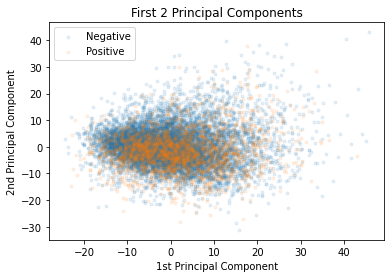

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [11]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs".format(lead, obs, lead, obs), calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


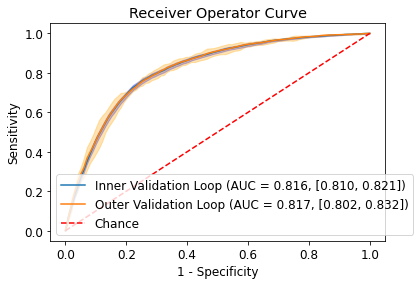

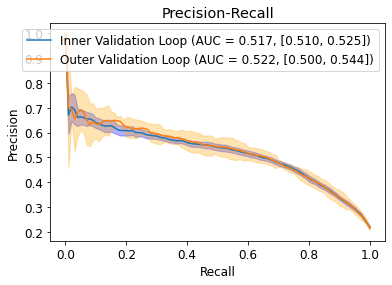

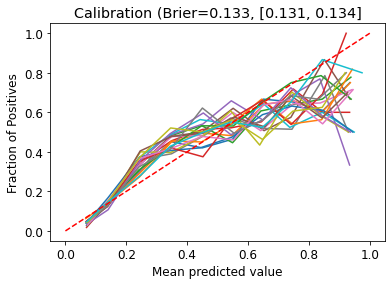

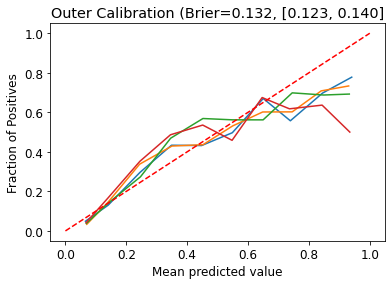

In [12]:
result_dict = lr_calibrated
name = "relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.015, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [14]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])
import pickle as pickle
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_selected_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(selected_feat, f)

146
LOS
Age
APACHEIVscore
UrgentAdmission
TeachingStatus
Gender
AdmitHeight
HistAngina
HistCABG
HistPulmEmb
HistHeartTransp
HistPUD
HistChemotherapy
HistDementia
HistNeuromuscularDis
HistSeizures
HistTIA
HistRestrictiveDis
relative_3hr_lead_3hr_obsAdrenergicBronchodilators
relative_3hr_lead_3hr_obsaminoglycosides
relative_3hr_lead_3hr_obsAnticholinergicBronchodilators
relative_3hr_lead_3hr_obsAnticoagulants
relative_3hr_lead_3hr_obsCephalosporins
relative_3hr_lead_3hr_obsGeneralAnesthetics
relative_3hr_lead_3hr_obsGlycopeptides
relative_3hr_lead_3hr_obsH2Blockers
relative_3hr_lead_3hr_obsInsulins
relative_3hr_lead_3hr_obsLaxatives
relative_3hr_lead_3hr_obsLincomycins
relative_3hr_lead_3hr_obsMacrolides
relative_3hr_lead_3hr_obsMAOIAntidepressants
relative_3hr_lead_3hr_obsNeuromuscularBlockers
relative_3hr_lead_3hr_obsOpioids
relative_3hr_lead_3hr_obsPenicillins
relative_3hr_lead_3hr_obsPhenylpiperazineAntidepressants
relative_3hr_lead_3hr_obsProtonPumpInhibitor
relative_3hr_lead_3hr_ob

In [15]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(dropped_feat, f)

relation__lag_3
hr_value__autocorrelation__lag_4
hr_value__fourier_entropy__bins_100
hr_value__sum_of_reoccurring_values
hr_value__fft_coefficient__attr_"abs"__coeff_1
hr_value__cwt_coefficients__coeff_10__w_5__widths_(2, 5, 10, 20)
hr_value__autocorrelation__lag_5
hr_value__fourier_entropy__bins_10
hr_value__longest_strike_above_mean
hr_value__skewness
hr_value__fourier_entropy__bins_5
hr_value__autocorrelation__lag_6
hr_value__kurtosis
hr_value__cwt_coefficients__coeff_11__w_5__widths_(2, 5, 10, 20)
hr_value__number_peaks__n_5
hr_value__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)
hr_value__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)
hr_value__number_peaks__n_1
hr_value__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"
hr_value__fourier_entropy__bins_3
hr_value__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"min"
hr_value__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"mean"
hr_value__large_standard_deviation__r_0.30000000000000004
hr_value__fourie

In [16]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl".format(lead, obs), "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [17]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

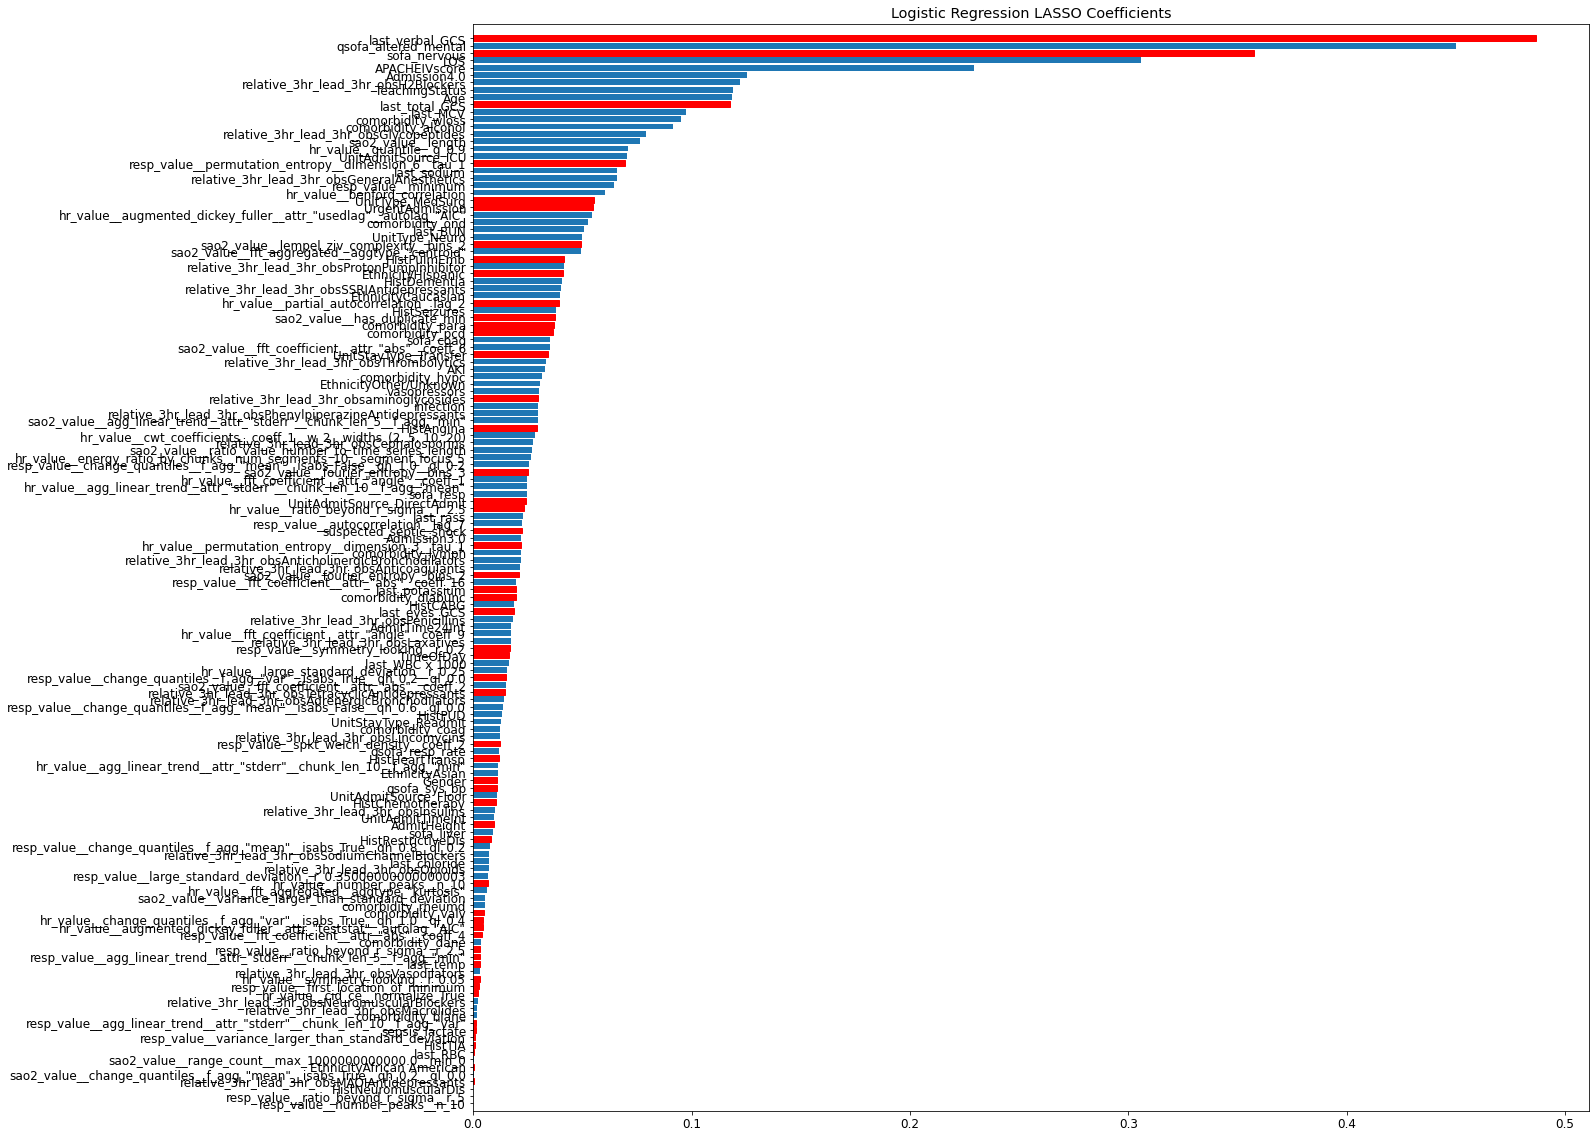

In [18]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

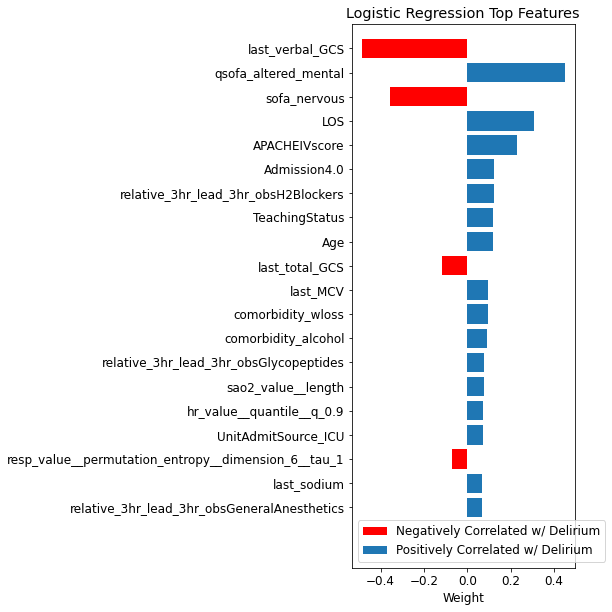

In [19]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_coefficients_short.png'.format(lead, obs), dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

In [ ]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/rf".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/rf".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

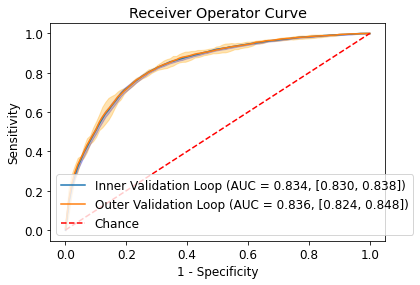

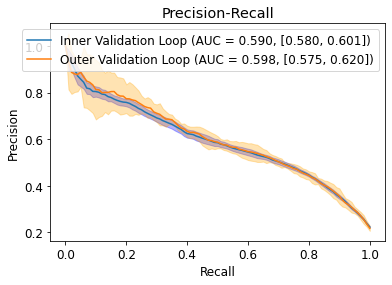

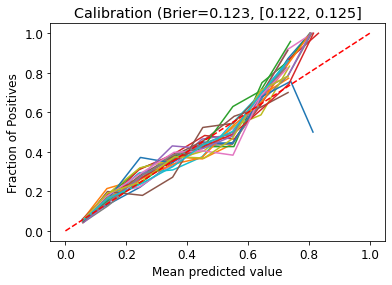

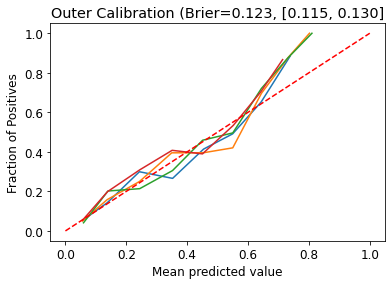

In [3]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_pruned_pts/rf".format(lead, obs), "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_{}hr_lead_{}hr_obs/mean_pruned_pts/rf".format(lead, obs)

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

In [14]:
catboost_result = run_cross_validation(data, "CatBoostClassifier", {"auto_class_weights" : "Balanced", "l2_leaf_reg" : 5}, "from catboost import CatBoostClassifier", run_once = True, bayes=False, dataset="relative_1hr_lead_6hr_obs_data/relative_1hr_lead_6hr_obs", calibrate=False)

al: 10.1s	remaining: 6.34s
614:	learn: 0.4007891	total: 10.1s	remaining: 6.32s
615:	learn: 0.4006133	total: 10.1s	remaining: 6.3s
616:	learn: 0.4003428	total: 10.1s	remaining: 6.28s
617:	learn: 0.4001537	total: 10.1s	remaining: 6.27s
618:	learn: 0.3999214	total: 10.2s	remaining: 6.25s
619:	learn: 0.3996135	total: 10.2s	remaining: 6.23s
620:	learn: 0.3994248	total: 10.2s	remaining: 6.22s
621:	learn: 0.3992061	total: 10.2s	remaining: 6.2s
622:	learn: 0.3991959	total: 10.2s	remaining: 6.18s
623:	learn: 0.3990423	total: 10.2s	remaining: 6.17s
624:	learn: 0.3988612	total: 10.2s	remaining: 6.15s
625:	learn: 0.3987051	total: 10.3s	remaining: 6.13s
626:	learn: 0.3985358	total: 10.3s	remaining: 6.11s
627:	learn: 0.3983226	total: 10.3s	remaining: 6.1s
628:	learn: 0.3982095	total: 10.3s	remaining: 6.08s
629:	learn: 0.3979450	total: 10.3s	remaining: 6.07s
630:	learn: 0.3978353	total: 10.3s	remaining: 6.05s
631:	learn: 0.3976056	total: 10.4s	remaining: 6.04s
632:	learn: 0.3975929	total: 10.4s	remai

In [20]:
catboost_result["iauc"]

array([0.80917297, 0.81547087, 0.80656371, 0.82145364, 0.81970437,
       0.81102667, 0.79484595, 0.81419231, 0.82217568, 0.81552553,
       0.81422872, 0.8142072 , 0.80442019, 0.81786605, 0.81463806,
       0.80321488, 0.78734536, 0.81755255, 0.81628503, 0.79984195])

In [93]:
import pickle
with open('../pickle/mean_relative_3hr/catboost_with_indicators', 'wb') as f:
    pickle.dump(catboost_result, f)

In [109]:
import pickle
with open('../pickle/mean_relative/catboost', 'rb') as f:
    catboost_result = pickle.load(f)

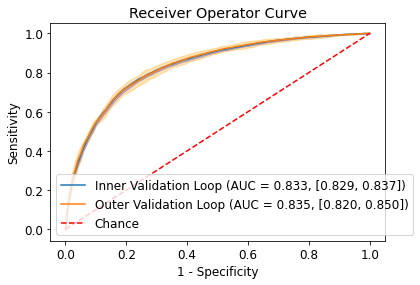

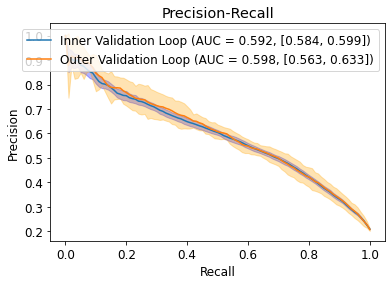

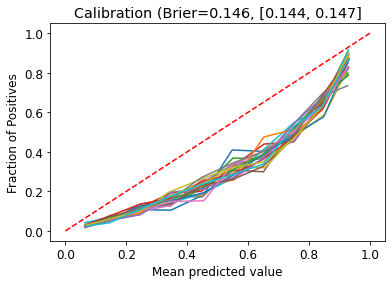

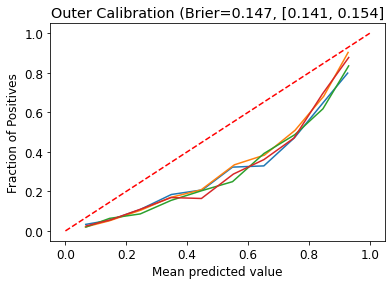

In [15]:
result_dict = catboost_result
name = "relative_1hr_lead_6hr_obs/mean_unpruned/catboost_no_pts"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

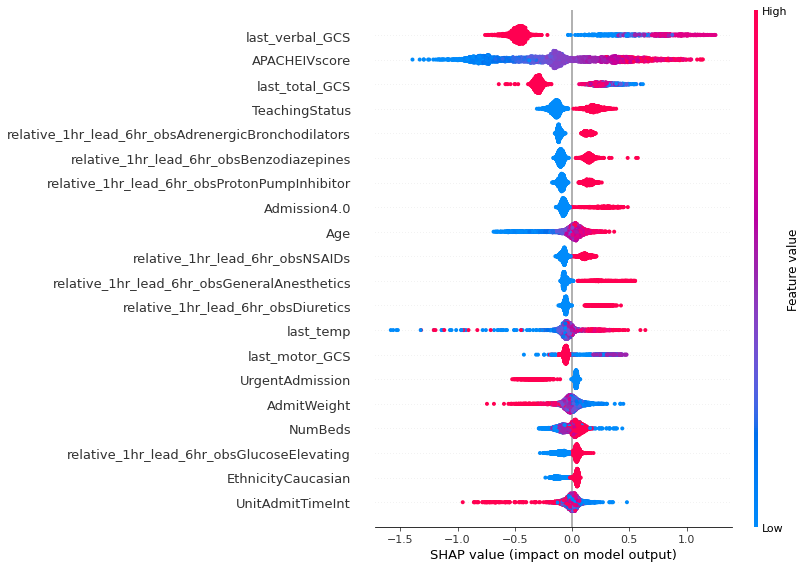

In [16]:
import shap
explainer = shap.TreeExplainer(catboost_result["imodels"][0])
temp_data = catboost_result["ipatid"][0].to_frame().merge(data, on="PatientStayID", how="inner")
shap_values = explainer.shap_values(temp_data.iloc[:, 1:])
shap.summary_plot(shap_values, temp_data.iloc[:, 1:], show=False)
plt.savefig("../figures/relative_1hr_lead_6hr_obs/mean_unpruned/catboost_shapley_plot_full.png", bbox_inches="tight")